In [146]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns


In [141]:
# def some kernels
def gaussian(x):
    return torch.exp(-x**2/2)

def boxcar(x):
    return torch.abs(x) < 1.0

def constant(x):
    return 1.0 + 0 * x

def epanechikov(x):
    return torch.max(1-torch.abs(x), torch.zeros_like(x))

def modifiers(x):
    return (torch.abs(x) < 1.0) * np.e * np.exp(-1/( (1 - x ** 2) * (torch.abs(x) < 1.0) + 1e-3))

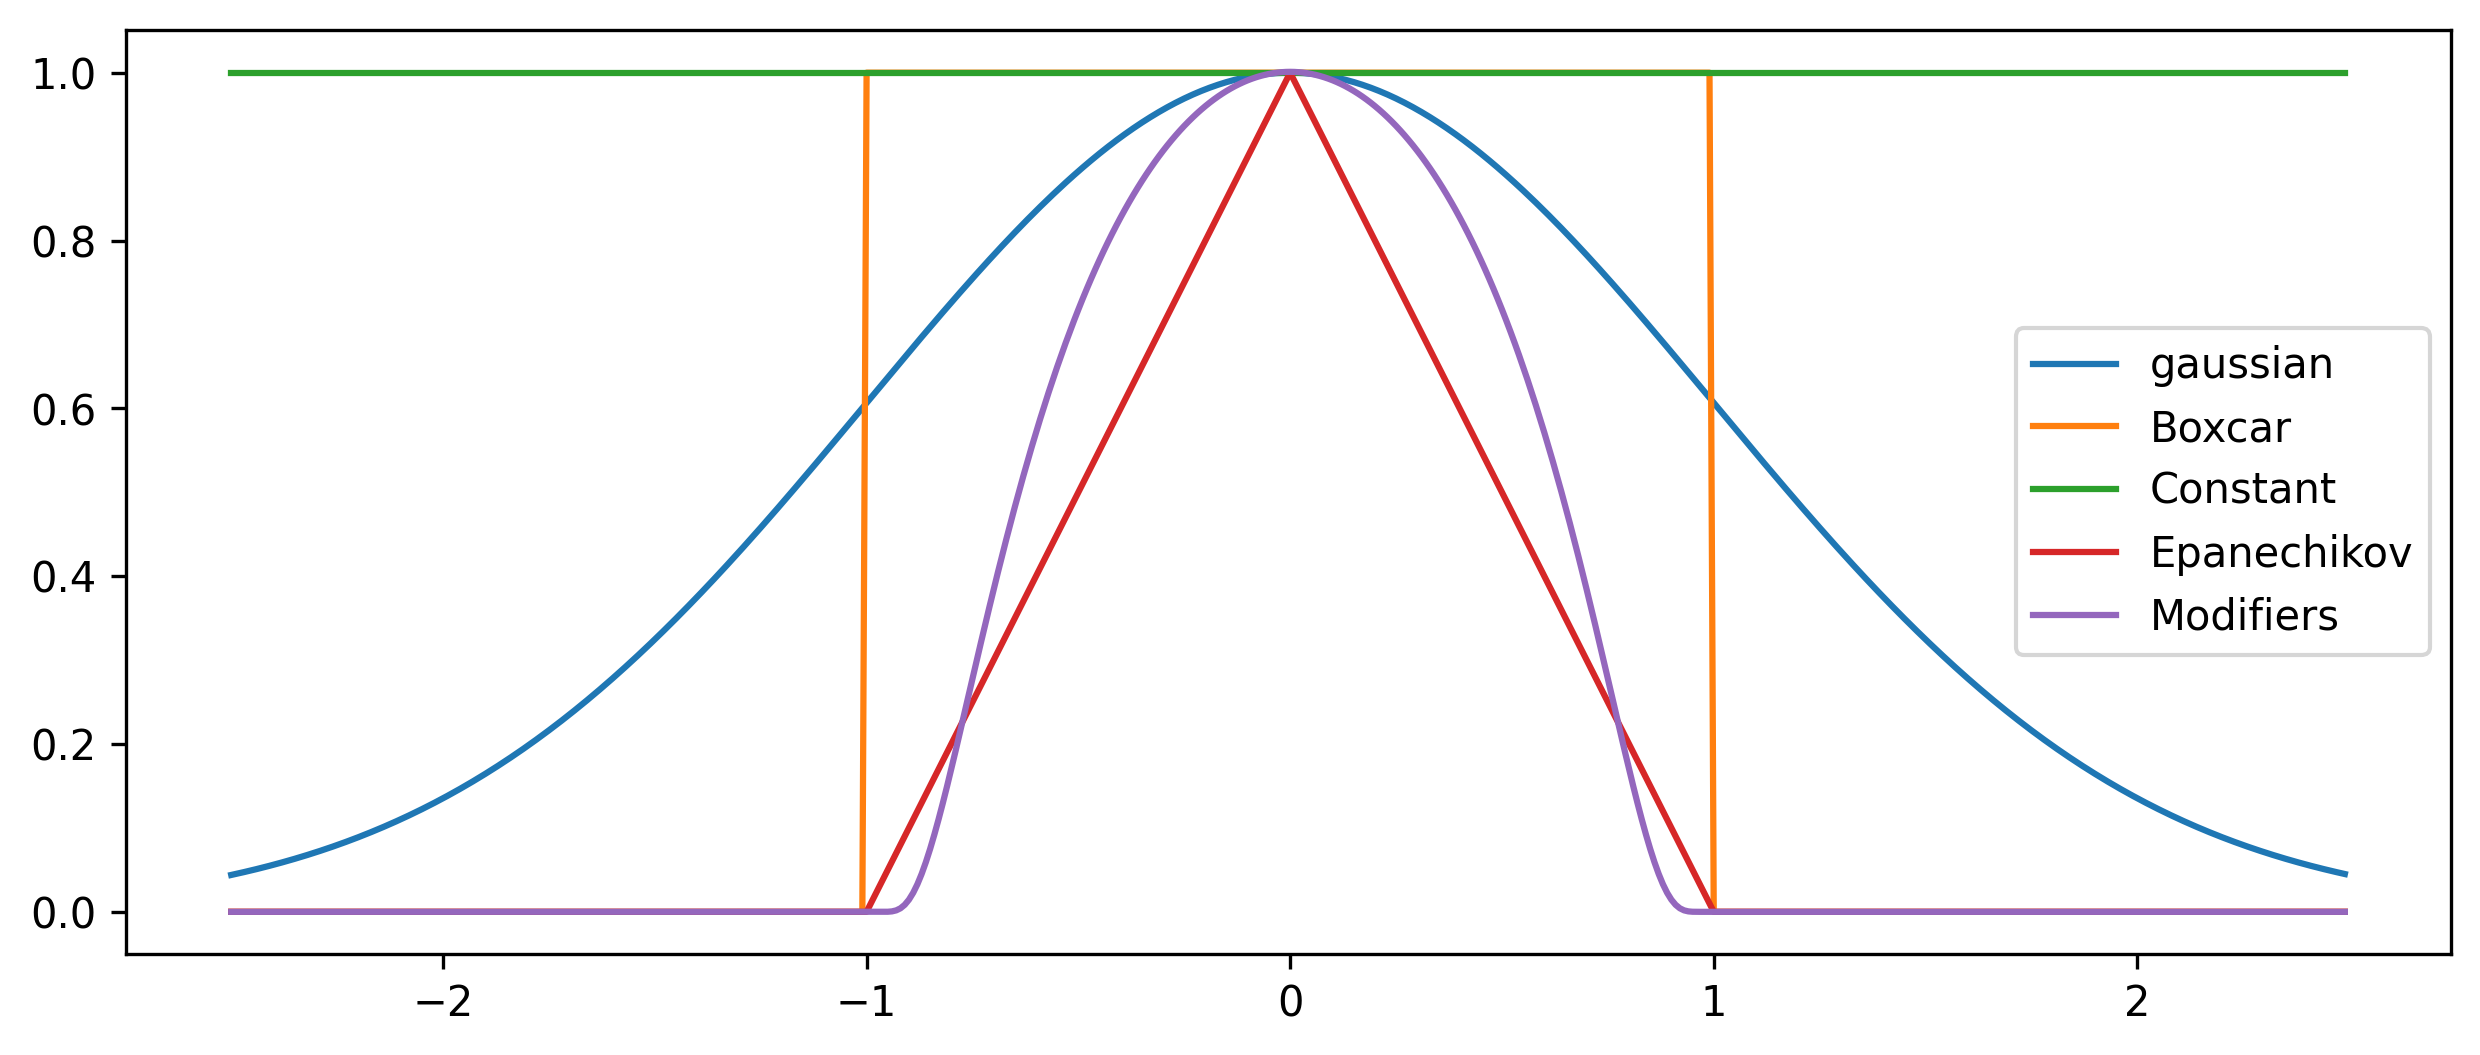

In [158]:
kernels = (gaussian, boxcar, constant, epanechikov, modifiers)
names = ("gaussian", "Boxcar", "Constant", "Epanechikov", "Modifiers")
x = torch.arange(-2.5, 2.5, 0.01)

plt.figure(figsize=(10,4), dpi=300)
for kernel, name in zip(kernels, names):
    plt.plot(x, kernel(x), label=name)
plt.legend()

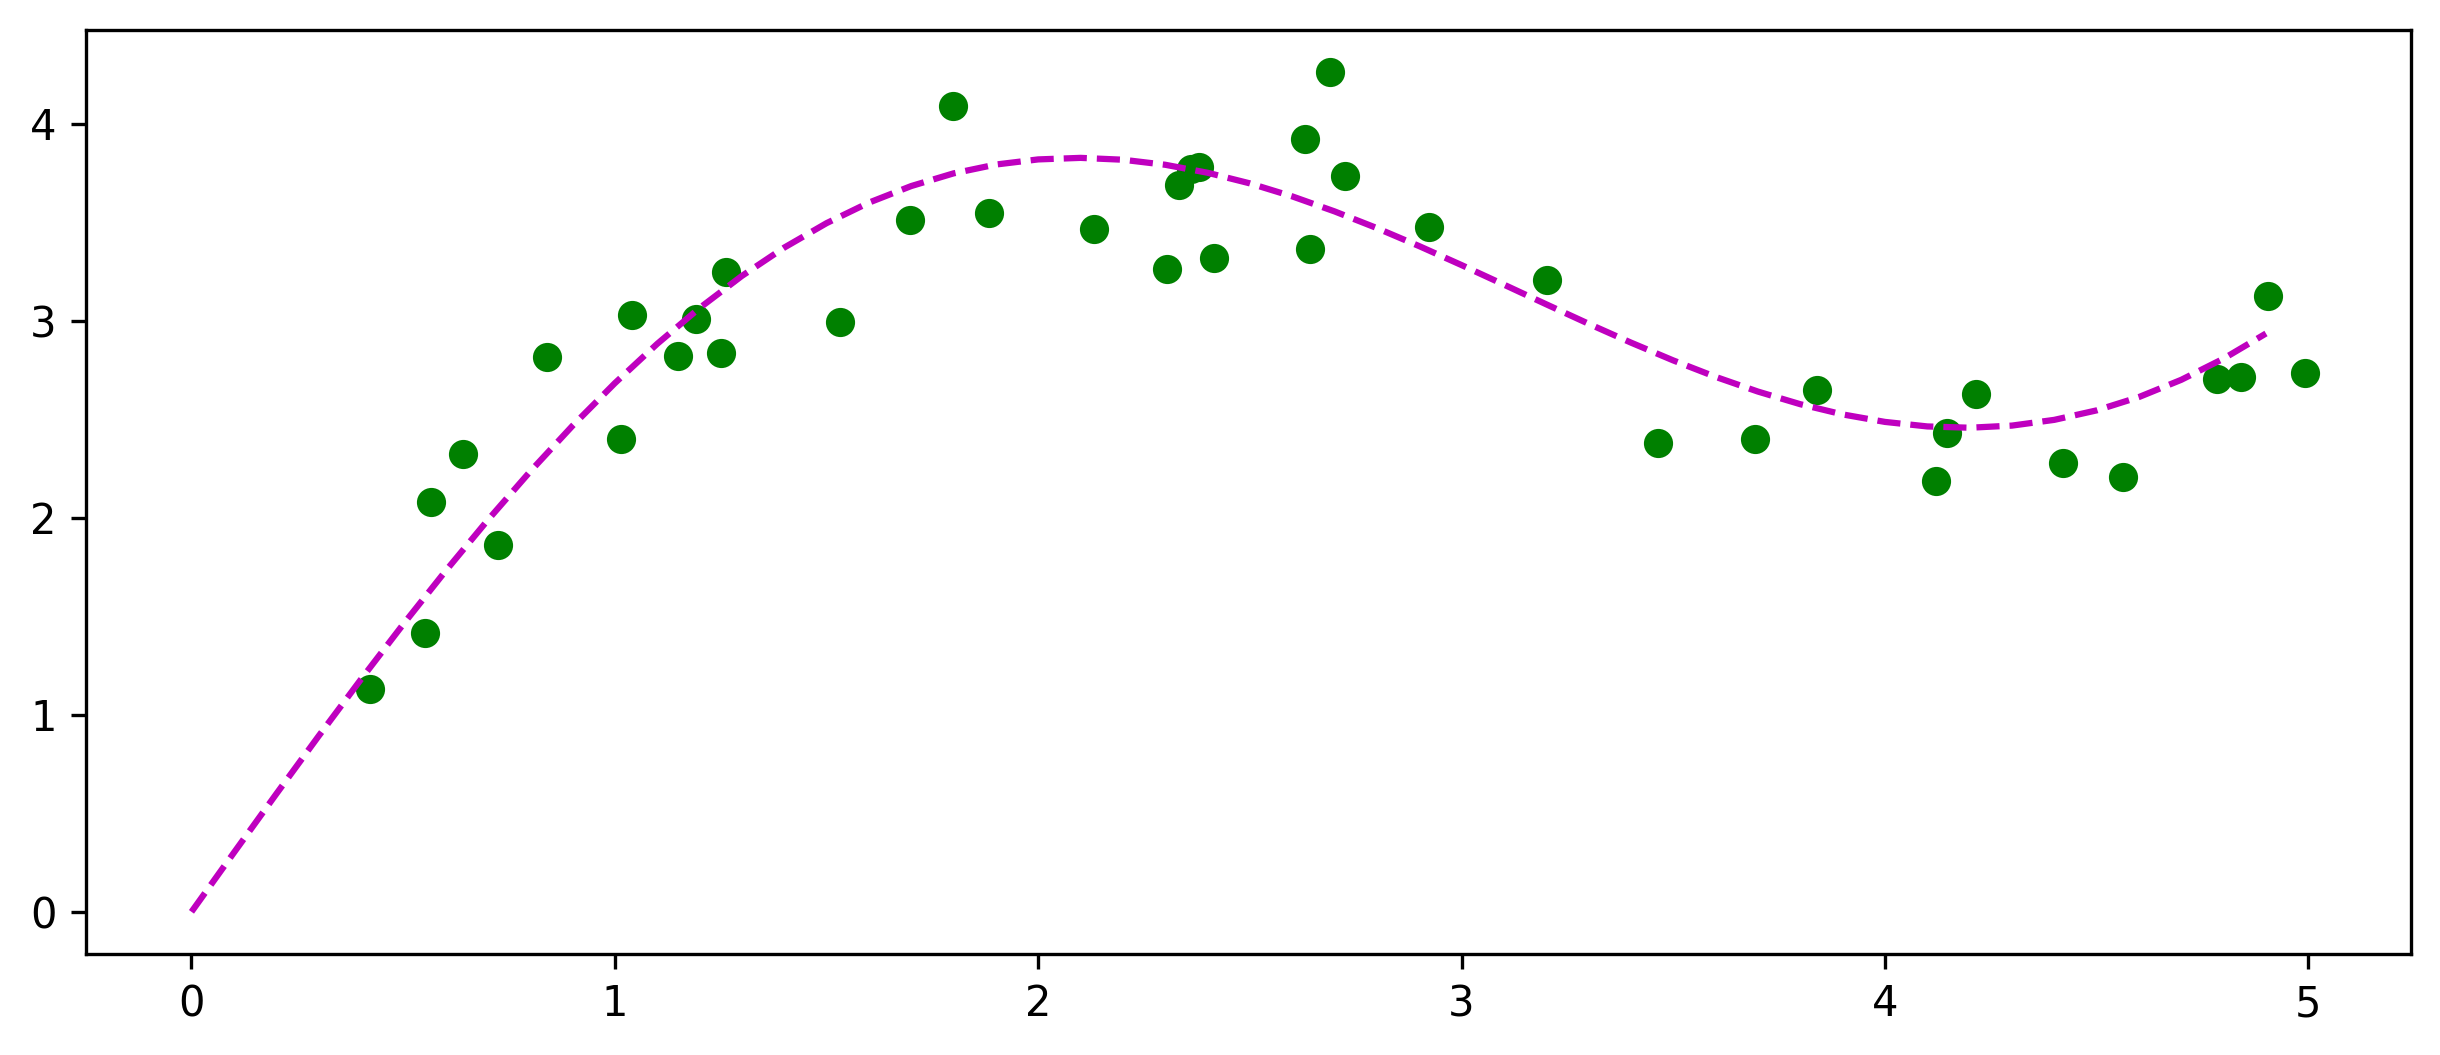

In [159]:
def f(x):
    return 2 * torch.sin(x) + x

n = 40
x_train, _ = torch.sort(torch.rand(n) * 5)
y_train = f(x_train) + torch.randn(n)*0.3
x_val = torch.arange(0, 5, 0.1)
y_val = f(x_val)
plt.figure(figsize=(10,4), dpi=300)
plt.scatter(x_train, y_train, c='g')
plt.plot(x_val, y_val,'m--')

In [160]:
# kernel regression
kernel = gaussian
def nadaraya_watson(x_train, y_train, x_val, kernel):
      Dist = x_val.reshape(-1,1) - x_train.reshape(1,-1) # Dist is a matrix, dim(x_val) * dim(x_train)
      k = kernel(Dist)
      W = k / k.sum(1, keepdim=True) # w: dim(x_val) * dim(x_train)
      y_train = y_train.reshape(-1,1)
      y_hat = torch.mm(W, y_train)
      return y_hat.view(-1)

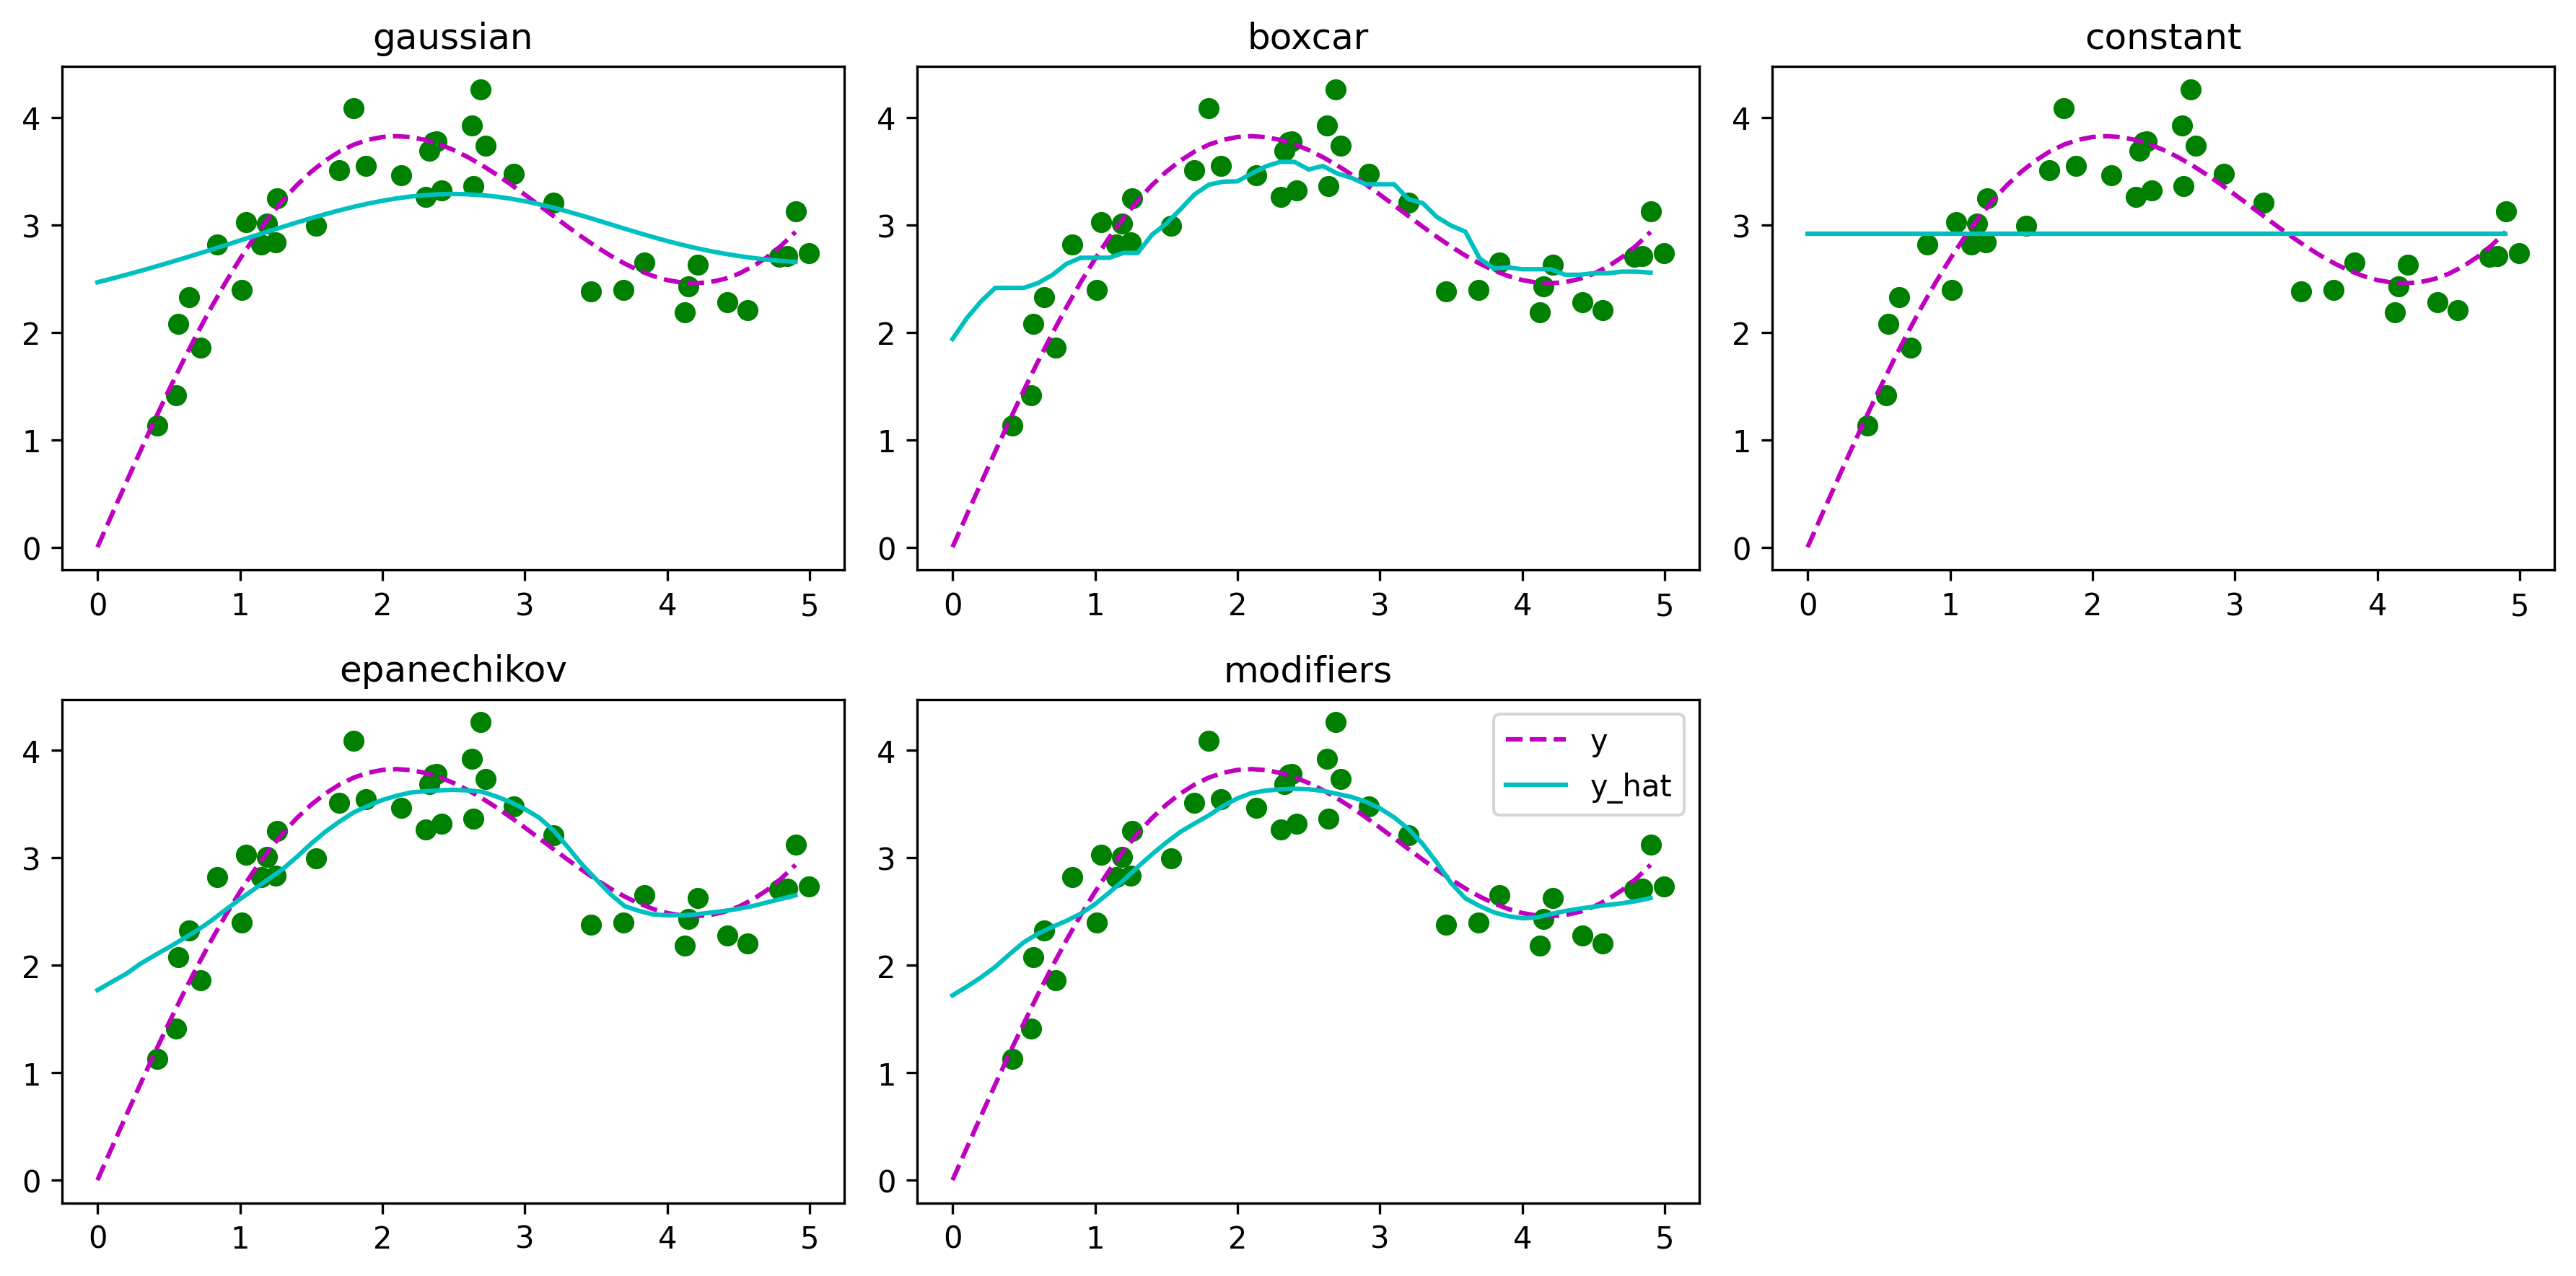

In [161]:
y_hat = nadaraya_watson(x_train, y_train, x_val, gaussian)

plt.figure(figsize=(12,6), dpi=300)
for i, kernel in enumerate(kernels):
    plt.subplot(2,3,i+1)
    y_hat = nadaraya_watson(x_train, y_train, x_val, kernel)
    plt.scatter(x_train, y_train, c='g')
    plt.plot(x_val, y_val,'m--', label = 'y')
    plt.plot(x_val, y_hat, 'c', label = 'y_hat')
    plt.title(kernel.__name__)
plt.legend()
plt.tight_layout()

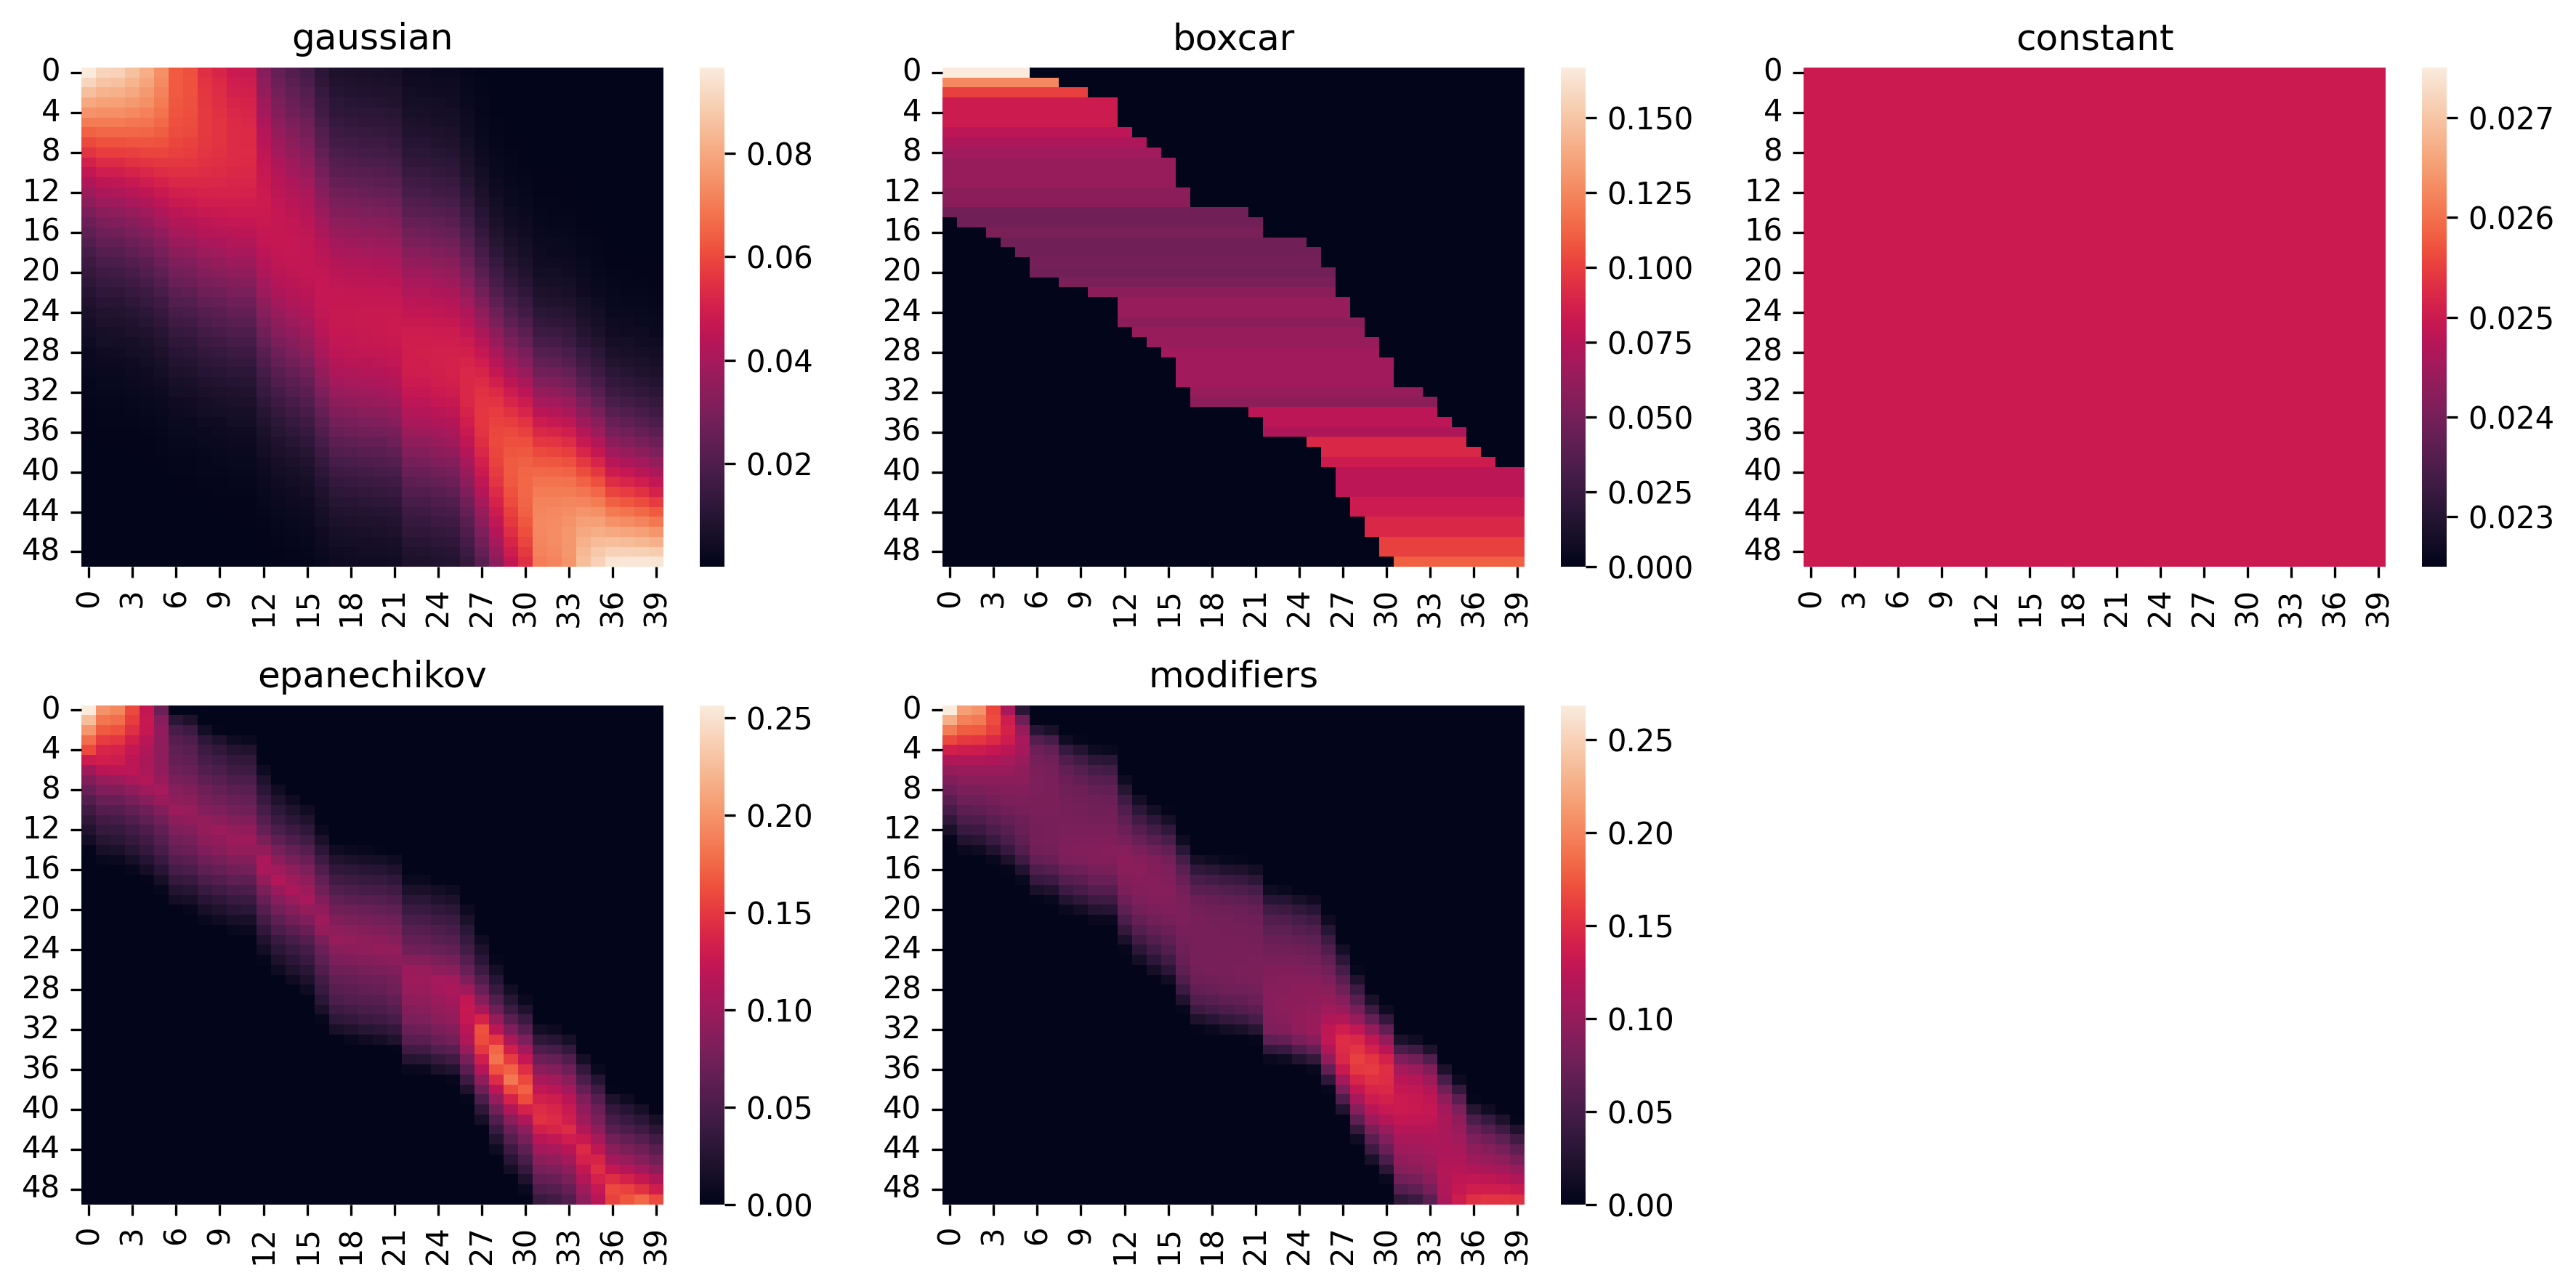

In [164]:
kernels = (gaussian, boxcar, constant, epanechikov, modifiers)
plt.figure(figsize=(12,6), dpi=300)
for i, kernel in enumerate(kernels):
      Dist = x_val.reshape(-1,1) - x_train.reshape(1,-1) # Dist is a matrix, dim(x_val) * dim(x_train)
      k = kernel(Dist)
      W = k / k.sum(1, keepdim=True) # w: dim(x_val) * dim(x_train)
      plt.subplot(2,3, i+1)
      sns.heatmap(W)
      plt.title(kernel.__name__)
      # plt.plot()
plt.tight_layout()

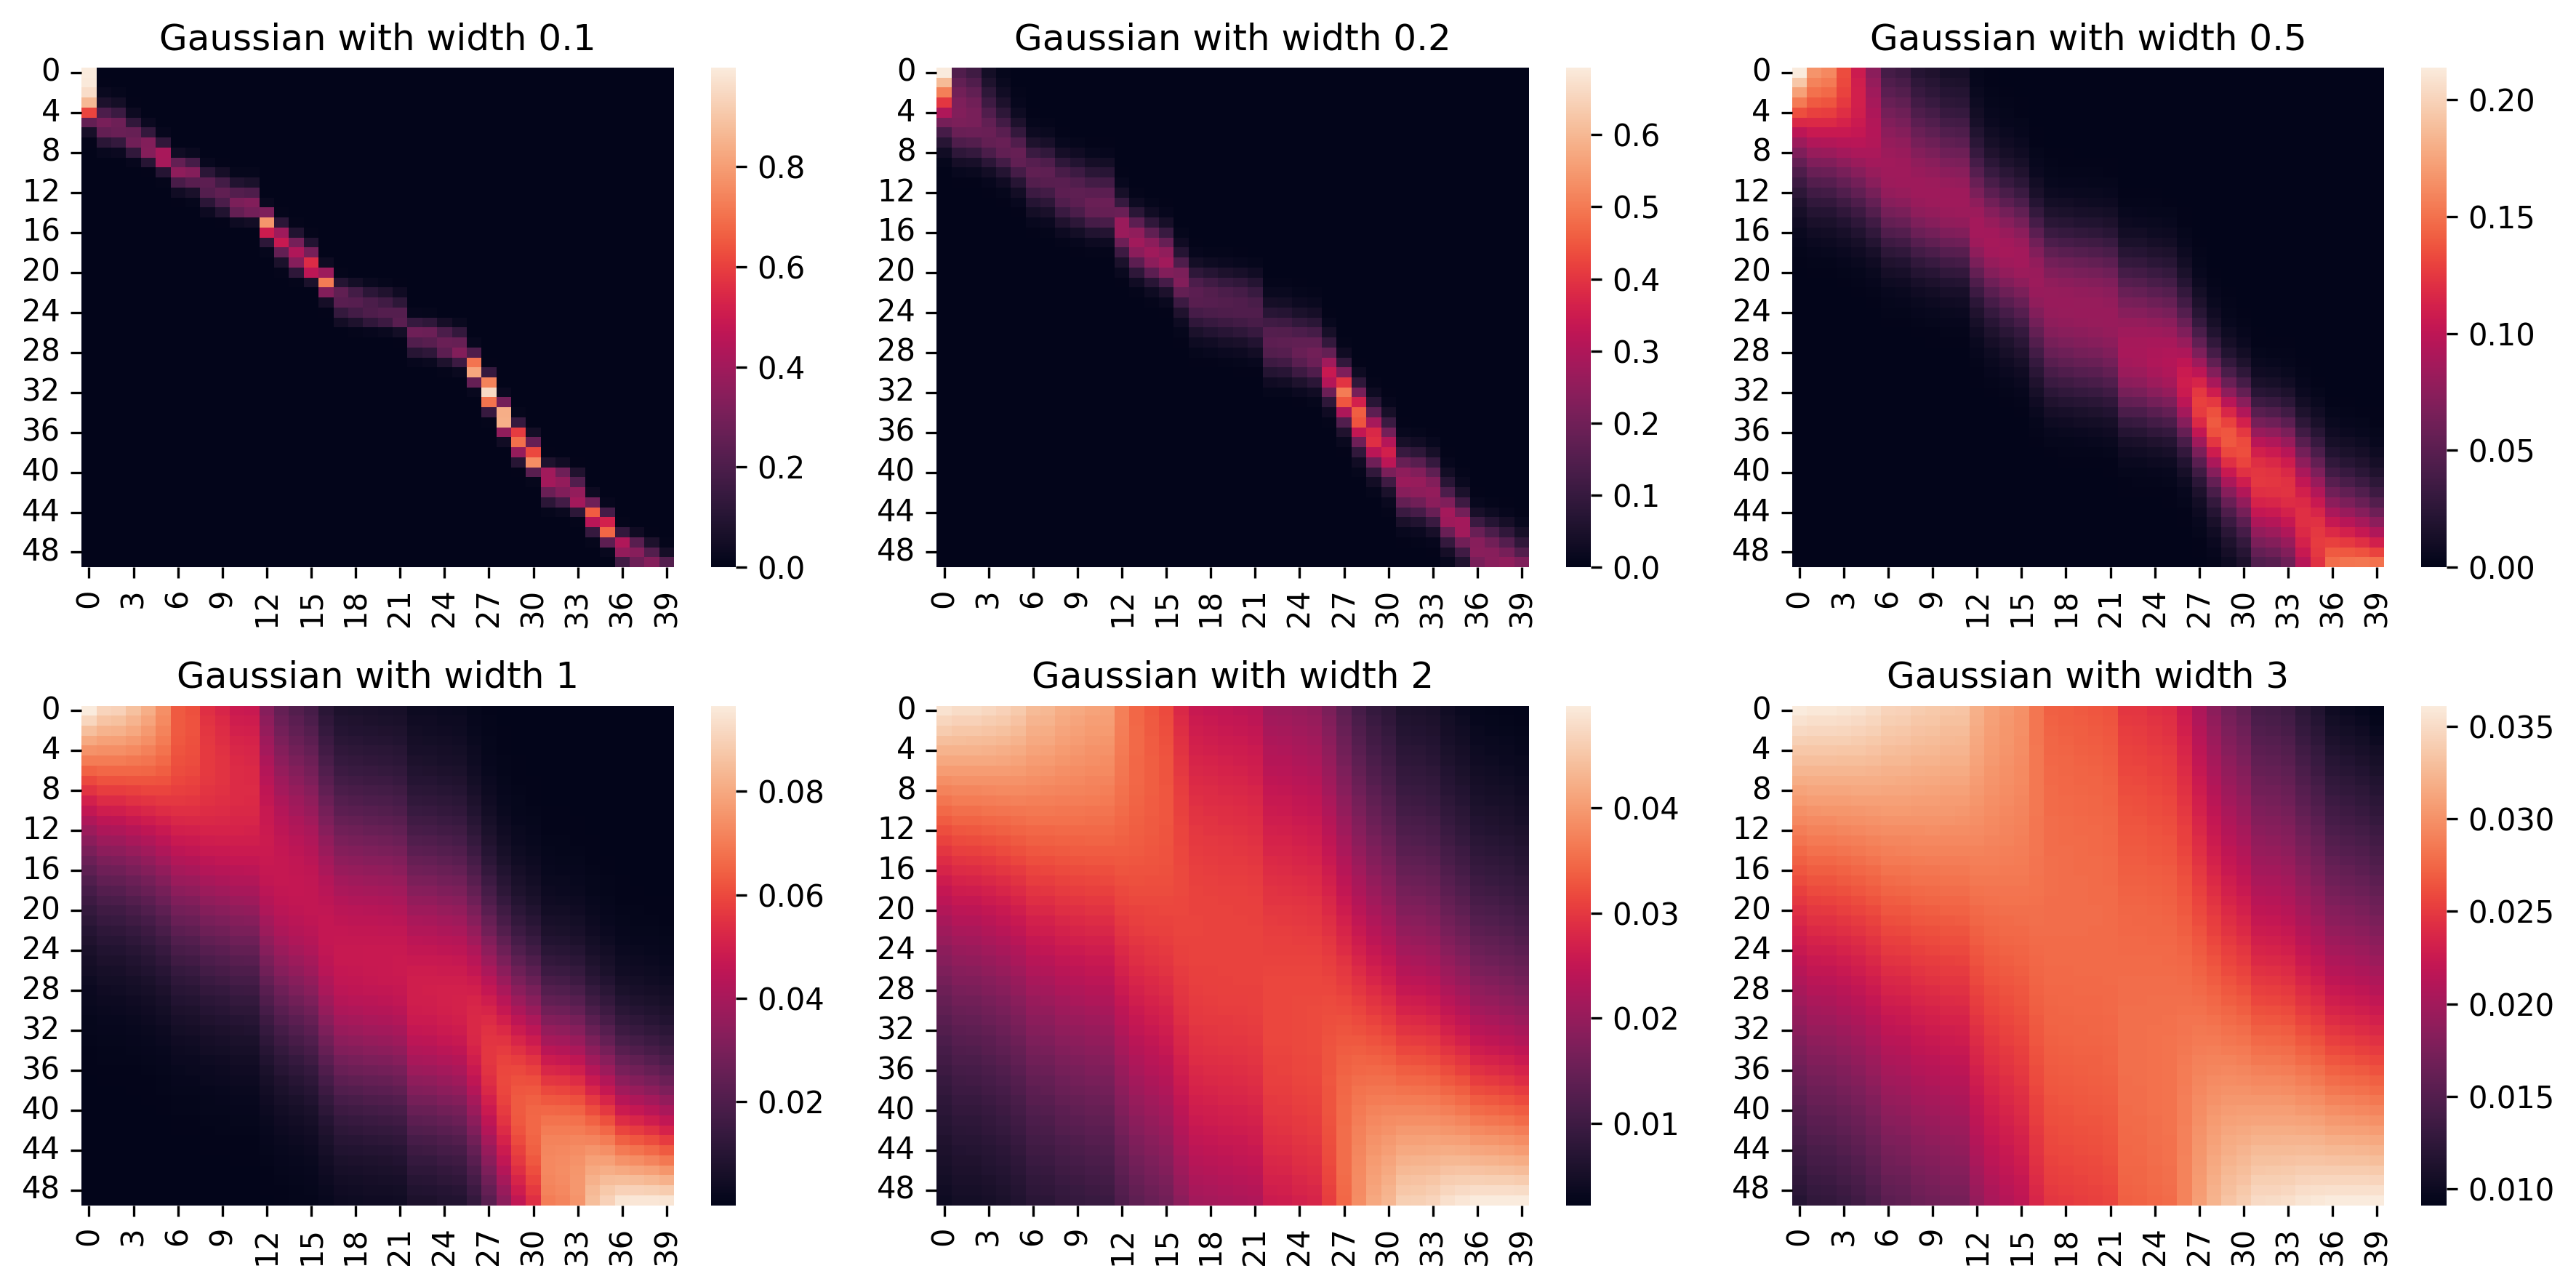

In [167]:
# Gaussian kernel with different wides

sigmas = [0.1, 0.2, 0.5, 1, 2, 3]

def gaussian_with_width(sigma):
    return (lambda x: torch.exp(-x**2 / (2*sigma**2)))

plt.figure(figsize=(12,6), dpi=300)
kernels = [gaussian_with_width(sigma) for sigma in sigmas]
for i, (kernel, sigma) in enumerate(zip(kernels, sigmas)):
      Dist = x_val.reshape(-1,1) - x_train.reshape(1,-1) # Dist is a matrix, dim(x_val) * dim(x_train)
      k = kernel(Dist)
      W = k / k.sum(1, keepdim=True) # w: dim(x_val) * dim(x_train)
      plt.subplot(2,3, i+1)
      sns.heatmap(W)
      plt.title("Gaussian with width {}".format(sigma))
      plt.plot()
plt.tight_layout()

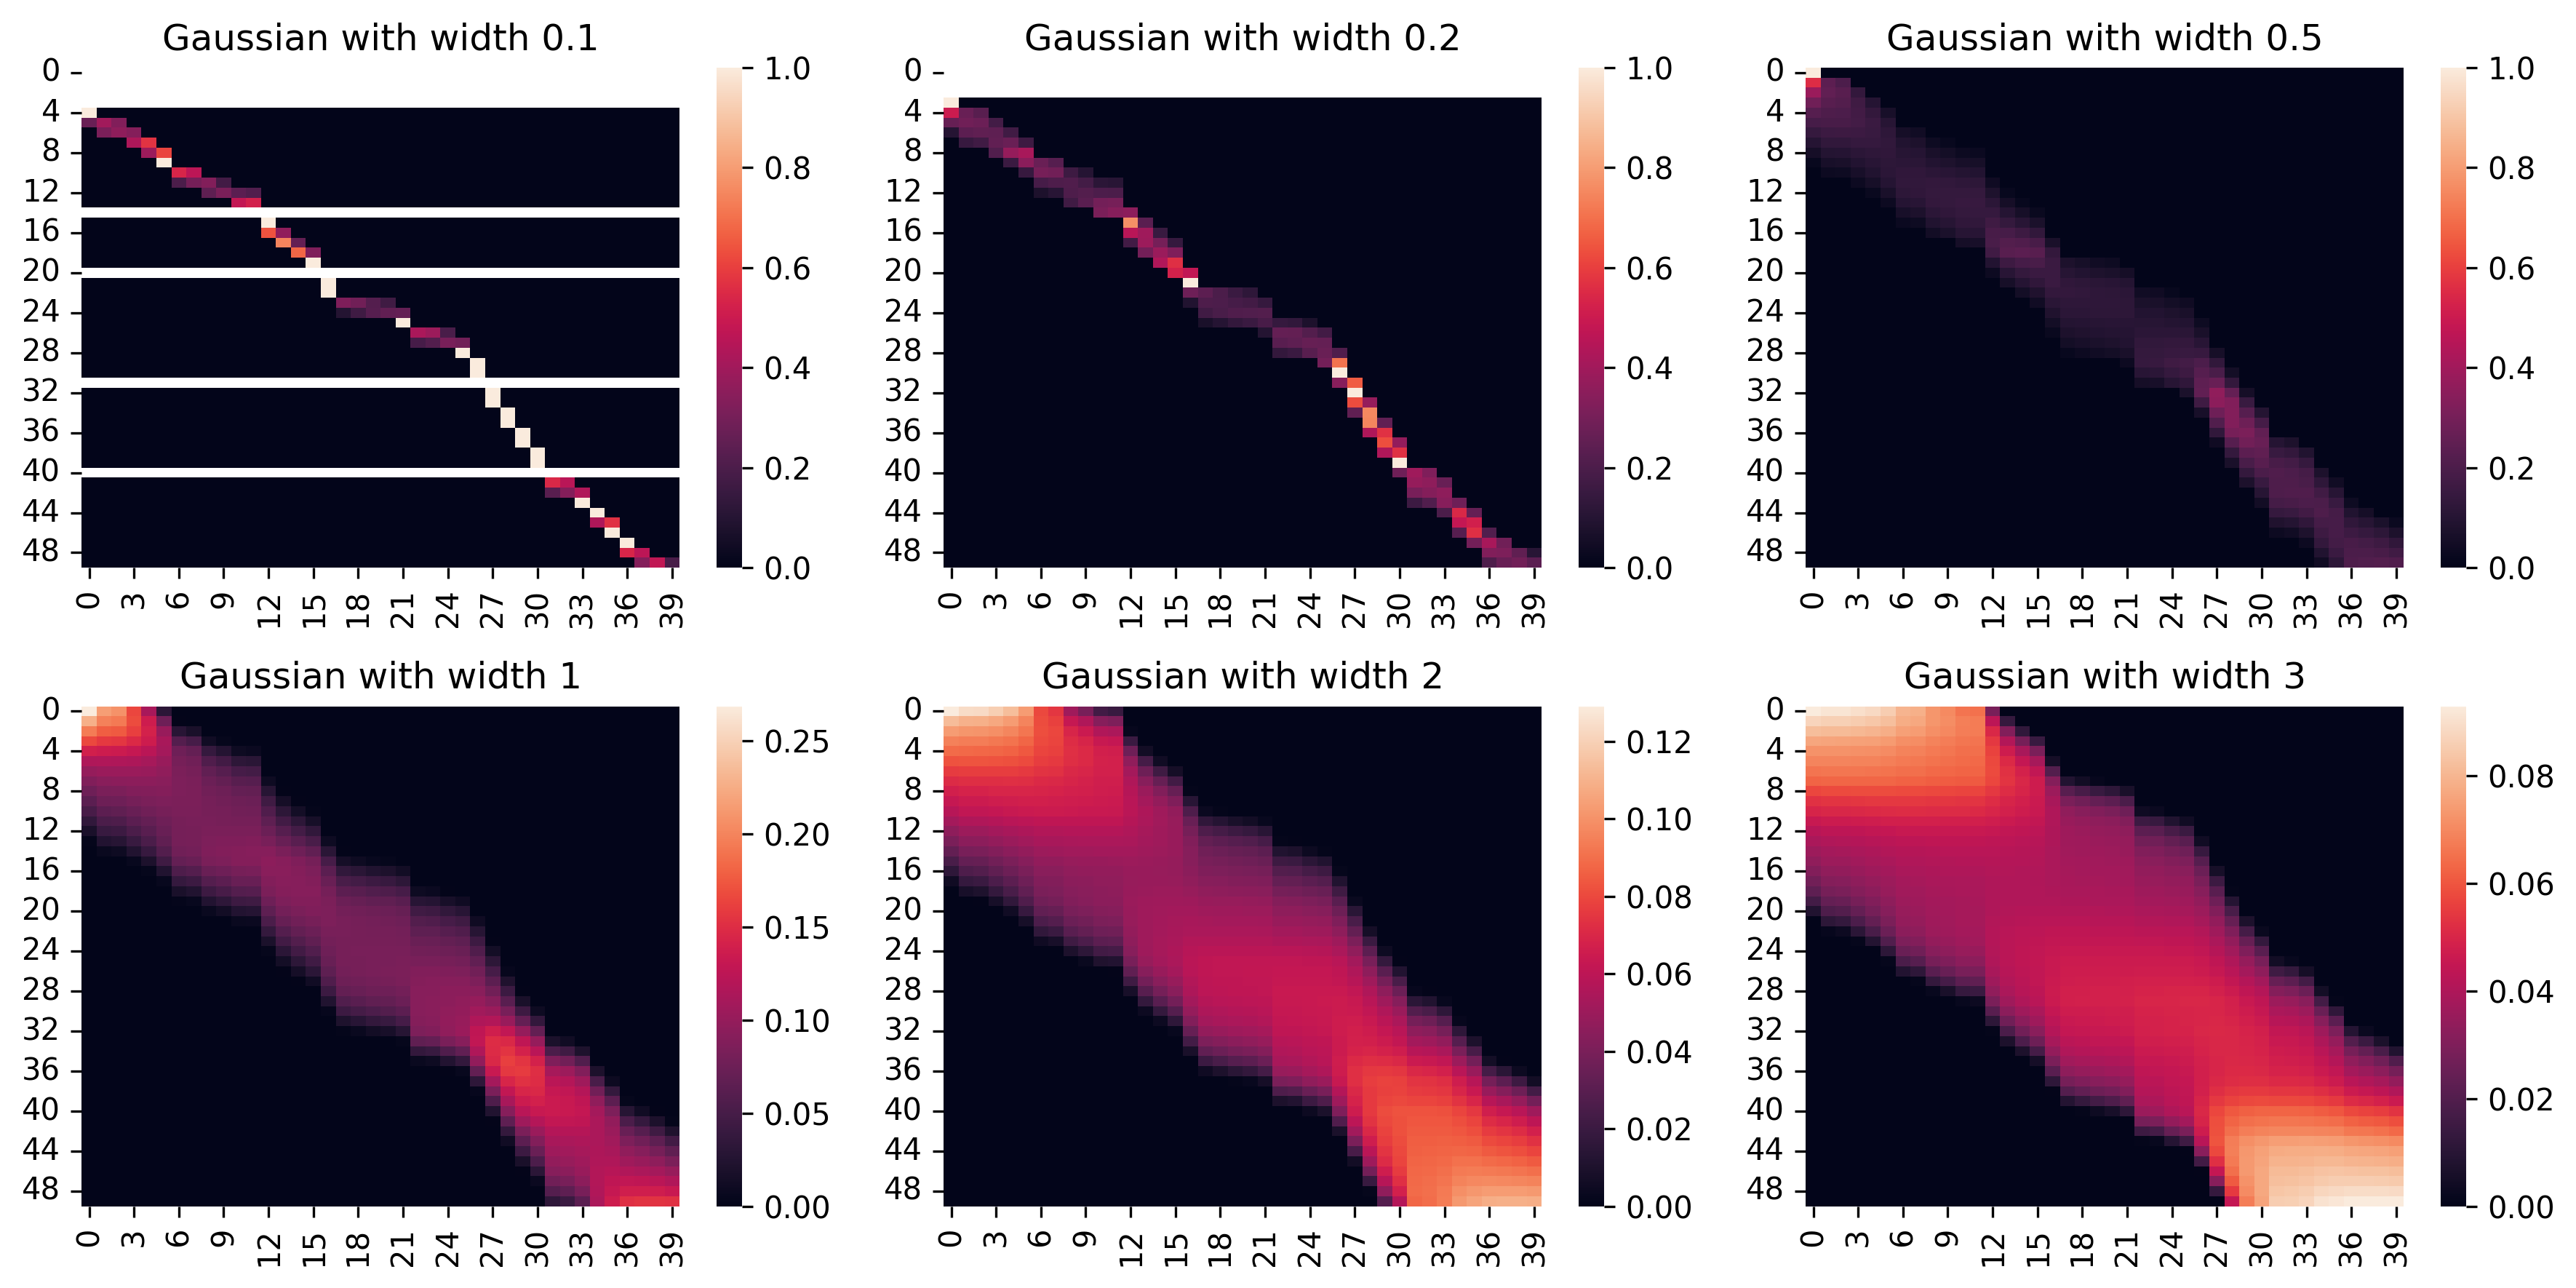

In [172]:
# Molifier kernel with different wides
sigmas = [0.1, 0.2, 0.5, 1, 2, 3]

def molifier_with_width(sigma):
    return (lambda x: (torch.abs(x) < sigma) * np.e * np.exp(-1/( (sigma - x ** 2) * (x ** 2 < sigma) + 1e-3)))


plt.figure(figsize=(12,6), dpi=300)
kernels = [molifier_with_width(sigma) for sigma in sigmas]
for i, (kernel, sigma) in enumerate(zip(kernels, sigmas)):
      Dist = x_val.reshape(-1,1) - x_train.reshape(1,-1) # Dist is a matrix, dim(x_val) * dim(x_train)
      k = kernel(Dist)
      W = k / k.sum(1, keepdim=True) # w: dim(x_val) * dim(x_train)
      plt.subplot(2,3, i+1)
      sns.heatmap(W)
      plt.title("Gaussian with width {}".format(sigma))
      plt.plot()
plt.tight_layout()